<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import math
from PIL import Image as im

#**Konvolusi tanpa Library**

**Membuat fungsi konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa :

Citra masukan,

Kernel berupa matriks untuk memfilter citra,

Nilai stride / besarnya pergeseran untuk setiap konvolusi,

Nilai pad yang akan ditambahkan pada citra

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
# mengubah gambar menjadi GRAY
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

In [4]:
# Fungsi untuk melakukan fungsi konvolusi secara manual
def convolution2D(image, kernel, padding, strides):
    # menjadikan korelasi silang dengan membalik matrik secara horizontal lalu vertical
    kernel = np.flipud(np.fliplr(kernel))

    # Mencari ukuran dari Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Menetapkan ukuran hasil konvolution berdasarkan hasil pencarian ukuran
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Menetapkan padding pada setiap sisi
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        # print(imagePadded)
    else:
        imagePadded = image

    # Perulangan untuk melakukan fungsi konvolusi
    for y in range(image.shape[1]):
        # pengkondisian jika memang telah sampai pada pada akhir batas y, dan akan keluar dari perulangan
        if y > image.shape[1] - yKernShape:
            break
        # pengkondisian untuk memastikan  ukuran langkah setara dengan jumlah langkah yang ditentukan
        if y % strides == 0:
            for x in range(image.shape[0]):
                # pengkondisian jika memang telah sampai akhir batas x, dan akan keluar dari perulangan
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Melakukan rumus fungsi konvolusi jika x sudah dipindahkan oleh stride
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


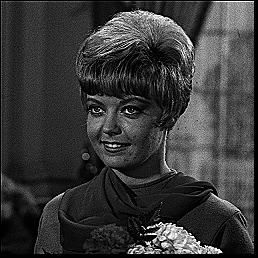

In [5]:
# menentukan kernel yang digunakan
kernel= np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# memanggil fungsi konvolusi yang telah dibuat dan memberikan berbagai atribut yang diperlukan
output = convolution2D(img_gray, kernel, 2, 1)
# Menampilkan hasil
cv2_imshow(output)

**3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:**

##**Sharpen**

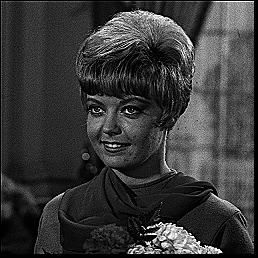

In [6]:
kernel_sharpen = np.array([[0, -1, 0], 
                           [-1, 5, -1],
                           [0, -1, 0]])

output_sharpen = convolution2D(img_gray, kernel_sharpen, 2, 1)
cv2_imshow(output_sharpen)

##**Emboss**






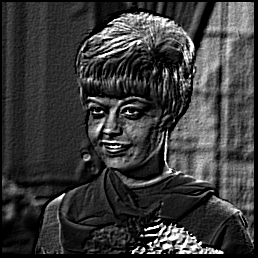

In [7]:
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1], 
                          [0, 1, 2]])

output_emboss = convolution2D(img_gray, kernel_emboss, 2, 1)
cv2_imshow(output_emboss)

##**Left Sobel Edge Detection**

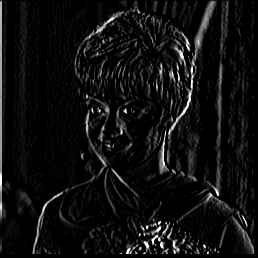

In [8]:
kernel_lsed = np.array([[1, 0, -1],
                        [2, 0, -2], 
                        [1, 0, -1]])

output_lsed = convolution2D(img_gray, kernel_lsed, 2, 1)
cv2_imshow(output_lsed)

##**Canny Edge Detection**

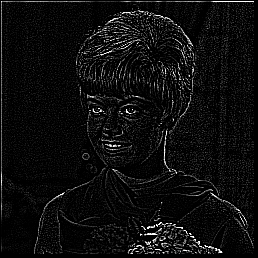

In [9]:
kernel_ced = np.array([[-1, -1, -1], 
                       [-1, 8, -1],
                       [-1, -1, -1]])

output_ced = convolution2D(img_gray, kernel_ced, 2, 1)
cv2_imshow(output_ced)

##**Prewitt Edge Detection**

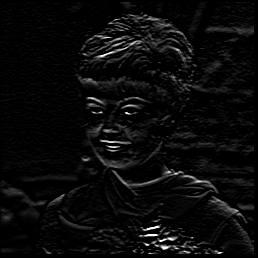

In [10]:
prewitt_ed = np.array([[-1, -1, -1],
                       [0, 0, 0], 
                       [1, 1, 1]])

output_ed = convolution2D(img_gray, prewitt_ed, 2, 1)
cv2_imshow(output_ed)

##**5x5 Gaussian Blur**

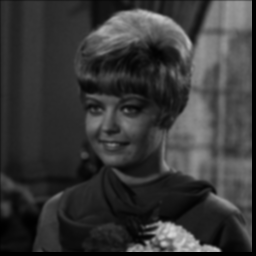

In [15]:
blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)

blur_img = convolution2D(img_gray, blur_5, 2, 1)
cv2_imshow(blur_img)

##**21x21 Gaussian Blur**

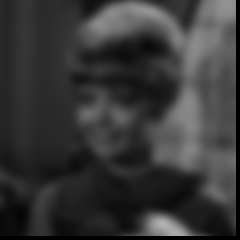

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size , sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()

output_gauss = convolution2D(img_gray, gauss_kernel, 2, 1)
cv2_imshow(output_gauss)

##**Average Filter 3x3**

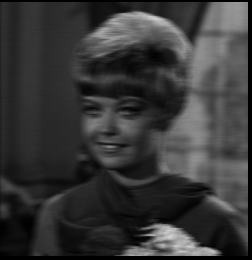

In [16]:
Average = np.array(
    [
    [1/9, 1/9, 1/9,
      1/9, 1/9, 1/9,
      1/9, 1/9, 1/9]

    ]
)

Average_img = convolution2D(img_gray, Average, 2, 1)
cv2_imshow(Average_img)

##**Low Pass Filter**

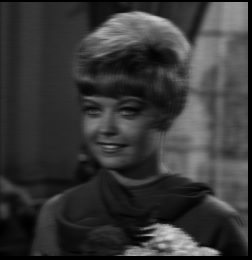

In [17]:
low_pass = np.array(
    [
    [1/12, 1/12, 1/12,
      1/12, 4/12, 1/12,
      1/12, 1/12, 1/12]

    ]
)

low_pass_img = convolution2D(img_gray, low_pass, 2, 1)
cv2_imshow(low_pass_img)

##**High Pass Filter**

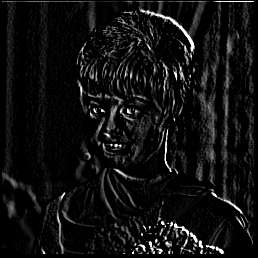

In [19]:
High_pass = np.array([[-1, 0, 1],
                       [-1, 0, 3], 
                       [-3, 0, 1]])

High_pass_img = convolution2D(img_gray, High_pass, 2, 1)
cv2_imshow(High_pass_img)